<h1 style = "font-size: 30px; font-family: Product Sans, sans-serif;"> Importing our Libraries
</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import pickle
import string
import os
import nltk
from matplotlib.ticker import FormatStrFormatter

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.listdir()

['.ipynb_checkpoints', 'Gender Prediction.ipynb', 'gender_clean.csv']

<h1 style = "font-size: 30px; font-family: Product Sans, sans-serif;"> Importing our Data
</h1>

The data used here has been preprocessed beforehand on a previous notebook.

In [3]:
df = pd.read_csv('gender_clean.csv')
display(df.head(10), df.shape)

,FirstName,gender
0,claudelino,1
1,maryjane,0
2,renold,1
3,eric,1
4,victor,1
5,cynthia,0
6,violeta,0
7,jecell ann,0
8,domidor,1
9,jil,1


(165200, 2)

In [4]:
df.gender.value_counts()

1    82600
0    82600
Name: gender, dtype: int64

<div class="alert alert-block alert-info">
<b>Note:</b> f: 0, m: 1
</div>

In [5]:
display(df.nunique() , df.isna().sum())

FirstName    39144
gender           2
dtype: int64

FirstName    0
gender       0
dtype: int64

In [6]:
fig = px.histogram(df, x="gender", color="gender", #facet_col="gender",
                   nbins=2, barmode="group",
                   opacity=0.8,
                   color_discrete_sequence=["#3C91E6", "#E7AD99"],
                   width=600, height=400)

fig.update_layout(title_text="Gender Distribution",
                  xaxis_title_text="Gender",
                  yaxis_title_text="Count")

fig.show()

<h1 style = "font-size: 30px; font-family: Product Sans, sans-serif;"> Data Training
</h1>
<h2 style = "font-size: 24px; font-family: Product Sans, sans-serif;"> Splitting our Data
</h2>

In [7]:
X = df['FirstName']
y = df['gender']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

<h2 style = "font-size: 24px; font-family: Product Sans, sans-serif;"> Using CountVectorizer() for feature extraction
</h2>

In [9]:
vectorizer = CountVectorizer(ngram_range=(2,2), analyzer="char")
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

<h2 style = "font-size: 24px; font-family: Product Sans, sans-serif;"> Using XGBoost, RandomForrestClassifier, LogisticRegression, and MultinomialNB
</h2>

For comparison

In [10]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

xgbc = xgb.XGBClassifier()
xgbc.fit(X_train, y_train)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [11]:
# make predictions for each model
y_pred_mnb = mnb.predict(X_test)
y_pred_xgb = xgbc.predict(X_test)
y_pred_rfc = rfc.predict(X_test)
y_pred_lr = lr.predict(X_test)

<h2 style = "font-size: 24px; font-family: Product Sans, sans-serif;"> Classification Report and Confusion Matrix
</h2>

In [12]:
print(f'XGBoost: \n {classification_report(y_test, y_pred_xgb)}\n\nRandomForestClassifier: \n {classification_report(y_test, y_pred_rfc)}')
print(f'\n\nLogReg: \n {classification_report(y_test, y_pred_lr)}\n\nMultinomialNB: \n {classification_report(y_test, y_pred_mnb)}')


XGBoost: 
               precision    recall  f1-score   support

           0       0.93      0.92      0.92     33165
           1       0.92      0.93      0.92     32915

    accuracy                           0.92     66080
   macro avg       0.92      0.92      0.92     66080
weighted avg       0.92      0.92      0.92     66080


RandomForestClassifier: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     33165
           1       0.95      0.95      0.95     32915

    accuracy                           0.95     66080
   macro avg       0.95      0.95      0.95     66080
weighted avg       0.95      0.95      0.95     66080



LogReg: 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88     33165
           1       0.88      0.88      0.88     32915

    accuracy                           0.88     66080
   macro avg       0.88      0.88      0.88     66080
weighted avg       0.88 

In [13]:
# calculate accuracy for each model
acc_mnb = accuracy_score(y_test, y_pred_mnb)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
acc_rfc = accuracy_score(y_test, y_pred_rfc)
acc_lr = accuracy_score(y_test, y_pred_lr)


print(f'MultinomialNB Accuracy Score: {acc_mnb*100:.1f}%')
print(f'LogisticRegression Accuracy Score: {acc_lr*100:.1f}%')
print(f'XGBoost Accuracy Score: {acc_xgb*100:.1f}%')
print(f'RandomForestClassifier Accuracy Score: {acc_rfc*100:.1f}%')

MultinomialNB Accuracy Score: 81.1%
LogisticRegression Accuracy Score: 87.8%
XGBoost Accuracy Score: 92.3%
RandomForestClassifier Accuracy Score: 94.8%


In [14]:
cm_mnb = confusion_matrix(y_test, y_pred_mnb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
cm_lr = confusion_matrix(y_test, y_pred_lr)

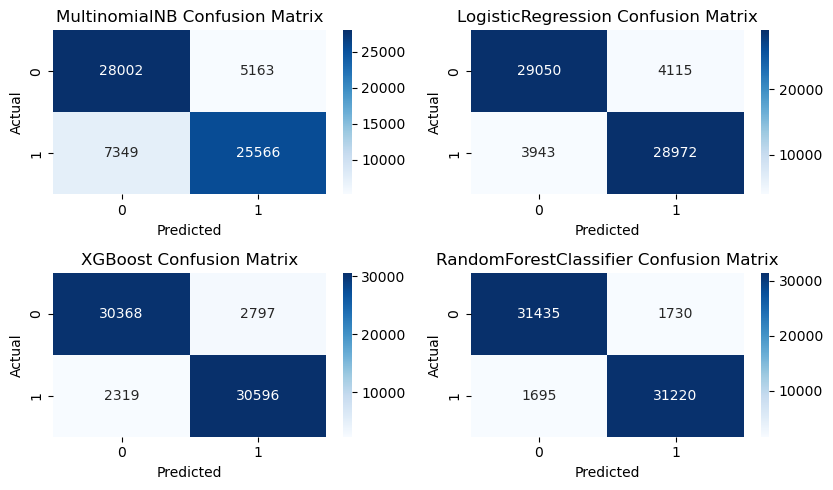

In [15]:
# Plot confusion matrices
plt.figure(figsize=(8.5, 5))
plt.subplot(2, 2, 1)
sns.heatmap(cm_mnb, annot=True, cmap='Blues', fmt='g')
plt.title('MultinomialNB Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.subplot(2, 2, 2)
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='g')
plt.title('LogisticRegression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.subplot(2, 2, 3)
sns.heatmap(cm_xgb, annot=True, cmap='Blues', fmt='g')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.subplot(2, 2, 4)
sns.heatmap(cm_rfc, annot=True, cmap='Blues', fmt='g')
plt.title('RandomForestClassifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

<h2 style = "font-size: 25px; font-family: Product Sans, sans-serif;"> Comparison of Four models  
</h2>

Comparing MultinomialNB, LogisticRegression, XGboostClassifier, and RandomForestClassifier.

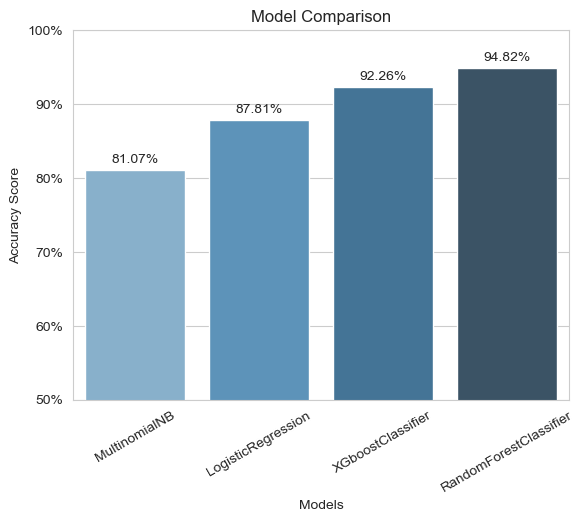

In [16]:
accuracies = [acc_mnb, acc_lr, acc_xgb, acc_rfc]
models = ['MultinomialNB', 'LogisticRegression', 'XGboostClassifier', 'RandomForestClassifier']

sns.set_style('whitegrid')
fig, ax = plt.subplots()
sns.barplot(x=models, y=accuracies, ax=ax, palette='Blues_d')

ax.set_title('Model Comparison')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy Score')

ax.set_ylim([0.5, 1.0])
ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])

for i, v in enumerate(accuracies):
    ax.text(i, v + 0.01, f"{v:.2%}", ha='center', fontsize=10)
    
plt.xticks(rotation = '30')

plt.show()

<h1 style = "font-size: 30px; font-family: Product Sans, sans-serif;"> Prediction Phase
</h1>
<h2 style = "font-size: 24px; font-family: Product Sans, sans-serif;"> Using RandomForestClassifier
</h2>

In [17]:
pred = pd.read_csv('../complete.csv', usecols=['FirstName', 'gender'])
pred

,FirstName,gender
0,Nena A.,NaN
1,Nena A.,NaN
2,Noel S.,NaN
3,Noel S.,NaN
4,Noel S.,NaN
...,...,...
778758,JAYSON,NaN
778759,JASMIN,NaN
778760,FERNANDO,NaN
778761,ARFE,NaN


In [18]:
pred.isnull().sum()

FirstName         0
gender       470745
dtype: int64

In [19]:
X_new_transformed = vectorizer.transform(pred["FirstName"])
y_pred = rfc.predict(X_new_transformed)

In [20]:
gender_map = {'f': 0, 'm': 1}
inv_gender_map = {v: k for k, v in gender_map.items()}
y_pred_labels = [inv_gender_map[y] for y in y_pred]
pred['predicted_gender'] = y_pred_labels

In [21]:
pred

,FirstName,gender,predicted_gender
0,Nena A.,NaN,f
1,Nena A.,NaN,f
2,Noel S.,NaN,m
3,Noel S.,NaN,m
4,Noel S.,NaN,m
...,...,...,...
778758,JAYSON,NaN,m
778759,JASMIN,NaN,f
778760,FERNANDO,NaN,m
778761,ARFE,NaN,f


<h2 style = "font-size: 24px; font-family: Product Sans, sans-serif;"> Random 20 names with gender and predicted_gender
</h2>

To compare the labeled data with the predicted 

In [22]:
comp = pred[['FirstName', 'gender', 'predicted_gender']].dropna()
shuffled_comp = comp.sample(frac=1) 
shuffled_comp.head(20)

,FirstName,gender,predicted_gender
133796,NESTOR,m,m
69311,GLENDA,f,f
433404,RAMIRO,m,m
280626,LORIANA,f,f
504068,KARLO GLENN,m,m
525481,JULIETA,f,f
533826,CECEILIA,f,f
177511,WENNIE,f,f
353785,ARCHIE,m,m
448315,VIVIAN,f,f


<h1 style = "font-size: 24px; font-family: Product Sans, sans-serif;"> Saving our model using pickle
</h1>

In [23]:
filename = 'gender_prediction_model.pkl'
model_dict = {'model': rfc, 'count_vectorizer': vectorizer}

if not os.path.exists(filename):
    with open(filename, 'wb') as file:
        pickle.dump(model_dict, file)
else:
    print(f"The file {filename} already exists. Skipping save.")


----

<h1 style = "font-size: 24px; font-family: Product Sans, sans-serif;"> Loading our model 
</h1>

In [24]:
with open('gender_prediction_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [25]:
model = loaded_model['model']
count_vectorizer = loaded_model['count_vectorizer']

In [26]:
sample = pd.DataFrame({'Name':['Teejay', 'Therence', 'Showbee', 'Royette', 'JhunBrian', 'Jan Christian', 'Myda Mira', 'nenen',
                              'tessa', 'pol','Princess Angel', 'Lilibeth'],
                      'gender':['m','m','f','m','m','m','f','f','f','m','f','f']})
sample

,Name,gender
0,Teejay,m
1,Therence,m
2,Showbee,f
3,Royette,m
4,JhunBrian,m
5,Jan Christian,m
6,Myda Mira,f
7,nenen,f
8,tessa,f
9,pol,m


In [27]:
X_sample = count_vectorizer.transform(sample["Name"])
y_pred_sample = model.predict(X_sample)
y_pred_labels = [inv_gender_map[y] for y in y_pred_sample]
sample['predicted_gender'] = y_pred_labels

sample

,Name,gender,predicted_gender
0,Teejay,m,m
1,Therence,m,m
2,Showbee,f,f
3,Royette,m,f
4,JhunBrian,m,m
5,Jan Christian,m,m
6,Myda Mira,f,f
7,nenen,f,f
8,tessa,f,f
9,pol,m,m
